# TP1 son 
## Hocine ABDELHAMID 
### M2 ISI, 21100727
----

### TP1 : propagation of a sound wave and acquisition with a microphone array

In this tutorial, we will study the sound wave we get on output when the microphone are in an array configuration.


### 1.1 preparation
1. Express $z_n$ as a function of the spacing d between the microphones.

On a directement : 
$$z_n = d\times(n - \frac{N}{2}) - \frac{d}{2}$$



### 1.1.1 Wave Front

#### Assumption 1 : the wave front is assumed to be a plane, cf. Fig1.
2. Express $d_n$ as a function of $z_n$ and the angle  $\theta _s$ , which is the angle of incidence defined
with respect to the axis [O, z] of the microphone array.
<img src= "images/Fig1.png">

$$d_n = -z_n\times cos(\theta _s)$$

this distance can either be positive or negative, depending on what microphone. A negative $d_n$ would represent a microphone that is closer from the source from the origin



3. Deduce the angle of incidence  $\theta _s$ , as a function of the delay $\delta _{\tau _n}$ 

as we have $d_n$, we know that $\delta _{\tau _n}  = \frac{d_n}{c}$ where c, is the sound celerity
$$\delta _{\tau _n}  = \frac{d_n}{c} = \frac{-z_n\times cos(\theta _s)}{c}$$
$$\theta _s = Arccos(-\frac{\delta _{\tau _n}c}{z_n})


### Assumption 2 : the wave front is assumed to be spherical, cf. Fig2.
4. Express the (Cartesian) coordinates of the source ($x_s$ , $z_s$ ) as a function of the distance $r_s$ between the source and the centre of the microphone array, the position of the $n_{th}$ microphone $z_n$ , the distance $d_n$ and the angles  $\theta _s$ and $d_n$ , the angle between the wave arriving at the $n_{th}$ microphone and that arriving at O.

here $d_n$ isn't equal to $d_n = z_n\times cos(\theta _s)$ anymore

we have :
$$z_n  = (r_s + d_n)\times sin(\alpha _s + d\alpha _n) + z_n$$
$$x_n  = (r_s + d_n)\times cos(\alpha _s + d\alpha _n)$$


In [37]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
#%matplotlib notebook
%matplotlib ipympl
# Faire la phase en f0, calculer le déphasage, retrouver delta _t .

In [22]:
# Case qui permet l'acquisiton et l'enrigistremetn
antenne=array('server') 

In [38]:
# m = antenne = array("play")

# Au lieu de rejouer le fichier antenne a chaque fois avec array("play") (ce qui est long et nécessite de restart le kernel a cause d'un bug)
# On va enregistrer le premier buffer de chaque fichier h5 grace a la fonction suivante dans utils.py
from utils import * 

save_folder_of_h5files_as_dict(folder_path="50cm_lateral", save_destination="matrices")

# Il nous suffit ensuite de load le dictionnaire grace a np.load(picke= true)
# 2eme facon de faire : 
# dic, antena = transform_h5_to_dict("50cm_lateral/100.h5") qui nous retourne directement l'antenne créer a partir du fichier passé en paramètre 



{'50cm_lateral/100.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-16 11:45:42.921823', 'duration': 2, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668595542.921823}}
Saved 100 to matrices folder
{'50cm_lateral/1000.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-16 11:53:30.465322', 'duration': 2, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668596010.465322}}
Saved 1000 to matrices folder
{'50cm_lateral/1100.h5': {

In [39]:
#Fichier a 100 Hz
antenne100 = np.load("matrices/100.npy", allow_pickle= True).item()
m = antenne100['mat']
Fs = antenne100['fs']
BLK = antenne100['blocksize']
N = antenne100['N']
d = antenne100['interspace']

In [30]:
def display_wave_forms(m, Fs, n = None):
    plt.figure()







    plt.legend()
    plt.title('signal en fonction du temps')
    plt.xlabel=("t (s)")
    plt.ylabel=("x")



In [ ]:

t = [i/Fs for i in range(m.shape[1])]
# Affichage du isgnal
plt.figure()
for i in [0,7]:
    plt.plot(t,m[i], label= f"m{i +1}")
plt.legend()
plt.title('signal en fonction du temps')
plt.xlim((0,0.01))
plt.xlabel=("t (s)")
plt.ylabel=("x")



[[ 0.17251441  0.18129093  0.15752496 ...  0.31299905  0.29134427
   0.271861  ]
 [ 0.10302609  0.06243091  0.05097017 ...  0.2545794   0.27403251
   0.29601905]
 [ 0.05220672  0.10332769  0.0695788  ...  0.21353182  0.21455726
   0.20864593]
 ...
 [-0.07090584 -0.02068967  0.02087062 ...  0.03821255  0.1012165
   0.12136329]
 [ 0.05549415  0.04611443 -0.06336587 ...  0.01161155  0.04617475
   0.08628737]
 [ 0.02488189 -0.00805268 -0.00500654 ...  0.01984519  0.06442147
   0.02681212]]


In [13]:
# m2 = np.load("matrices/100.h5.npy", allow_pickle=True).item()['mat']
print(np.array_equal(m2,m))


False


En zoomant, on obtient une vitesse v de 54m/s ce qui est trop éloigné de la valeur réel de la vitesse a 21degré dans l'air

<IPython.core.display.Javascript object>


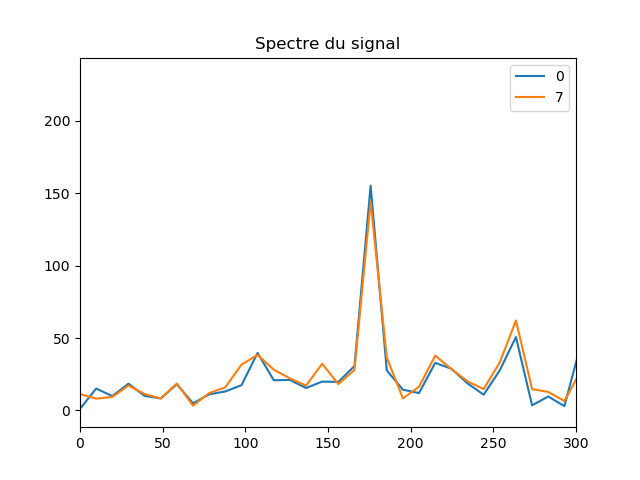

<IPython.core.display.Javascript object>


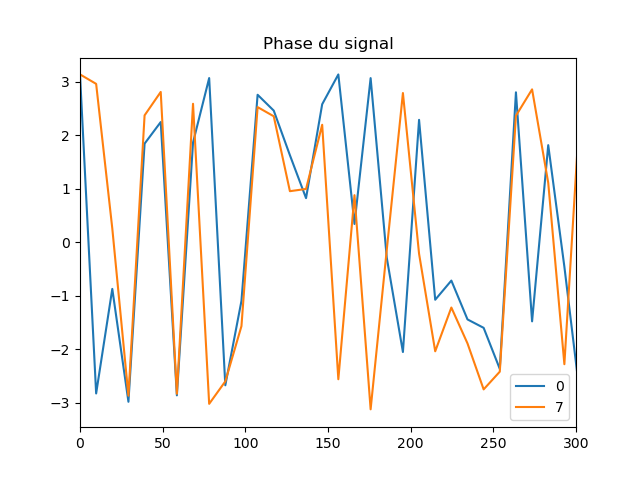

In [14]:
def fourier(x, Fs,i, mode = "modulus", K = None, newFig = 0,limaxis= 1000 ):
    if newFig: 
        plt.figure()
    if K == None:
        K = len(x)
    freq = np.fft.fftfreq(K, 1/Fs)
    sp = np.fft.fft(x, K)
    if mode == "phase" or mode == "angle":
        plt.title("Phase du signal")
        plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.angle(sp)), label = i)
        plt.ylabel=("Phase")
    if mode == "modulus":
        plt.title("Spectre du signal")

        plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(sp)), label = i)
        plt.ylabel=("Module")

    plt.xlabel=("frequence")
    plt.xlim(0,limaxis)

# On regarge entre les micros 1 et 8 pour etre plus précis dans le calcul du son
mics = [0,7]

for i in mics:
    fourier(m[i], Fs,i, "modulus", newFig = not i, limaxis = 300)
plt.legend()
for i in mics:
    fourier(m[i], Fs, i, "phase", newFig = not i, limaxis =300)

plt.legend()

On observe bien un pic a 100 hz, mais aussi un pic plus grand a 175. celui ci est du au gens qui parletn dans la salle


In [35]:
print(zn)

[-0.21, -0.15, -0.09, -0.03, 0.03, 0.09, 0.15, 0.21]
